In [2]:
import requests
import cv2
from matplotlib import pyplot as plt 
import numpy as np

Find the homography matrix that transforms image1 to image 2 and plot the results

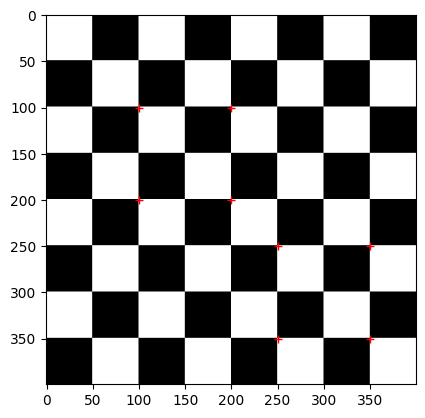

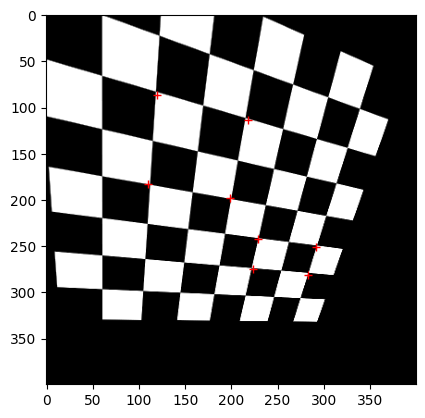

In [13]:
image1 = cv2.imread('data/images/checkerboard1.png', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('data/images/checkerboard2.png', cv2.IMREAD_GRAYSCALE)


pts1 = np.array([[100, 100],[100, 200], [200, 100], [200,200], 
                 [250, 250],[250, 350], [350, 250], [350,350]]).T
pts2 = np.array([(120, 86), (218, 114), (110, 183), (199, 198),
                (229, 242), (292, 251), (223, 275), (283, 281)]).T

plt.imshow(image1, cmap='gray')
plt.plot(pts1[0,:], pts1[1,:],'r+')  # [0,:] -- first row which is the x-coordinates, [1,:] -- second row which is the y-coordinates   
plt.show()
plt.imshow(image2, cmap='gray')
plt.plot(pts2[0,:], pts2[1,:],'r+')

In [14]:
pts1.shape          # look at first col to get the x coordinate

(2, 8)

In [15]:
pts2.shape

(2, 8)

In [31]:
input_pts = np.array(pts1[:,:4], dtype=np.float32).T
print(input_pts)

[[100. 100.]
 [100. 200.]
 [200. 100.]
 [200. 200.]]


In [30]:
output_pts = np.array(pts2[:,:4], dtype = np.float32).T
print(output_pts)

[[120.  86.]
 [218. 114.]
 [110. 183.]
 [199. 198.]]


In [72]:
H = cv2.getPerspectiveTransform(input_pts, output_pts) 

pts2_ = cv2.perspectiveTransform(pts1.T.reshape(8, 1, 2).astype(np.float32), H)
    ## perspectiveTransform --> computes the dot product in a different computing system
    ## need to reshape pts1 --> 8 rows, 1 col, 2 = y-coordinates are in the third dimension (can also put -1 instead of 8)

In [73]:
pts2_

array([[[120.     ,  86.     ]],

       [[218.     , 114.     ]],

       [[110.     , 183.     ]],

       [[199.     , 198.     ]],

       [[227.38908, 238.24782]],

       [[290.9213 , 245.88934]],

       [[210.836  , 297.3423 ]],

       [[270.7182 , 299.67645]]], dtype=float32)

In [80]:
pts2_.flatten()

array([120.     ,  86.     , 218.     , 114.     , 110.     , 183.     ,
       199.     , 198.     , 227.38908, 238.24782, 290.9213 , 245.88934,
       210.836  , 297.3423 , 270.7182 , 299.67645], dtype=float32)

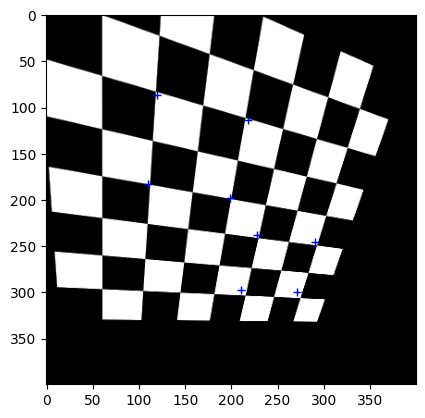

In [89]:
plt.imshow(image2, cmap = 'gray')
plt.plot(pts2_[:,:,0].flatten(), pts2_[:,:,1].flatten(), 'b+')

In [ ]:
H, mask = cv2.findHomography(pts1, pts2, cv2.RANSAC)        # mask is the inliers?

#### you can see that 6/8 points are accurate, the last two are not

In [81]:
# outputNew = cv2.warpPerspective(pts1.T.astype(np.float32), H, (image1.shape[1], image1.shape[0]), flags=cv2.INTER_LINEAR)

##### transformed the image, not the points

In [78]:
output = cv2.warpPerspective(image1, H, (image1.shape[1], image1.shape[0]), flags=cv2.INTER_LINEAR)

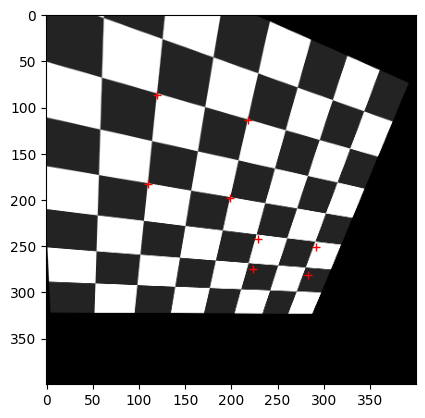

In [79]:
plt.imshow(output, cmap = 'gray')
plt.plot(pts2[0,:], pts2[1,:],'r+')